In [1]:
import glob
import pytz
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the Confirmed CSV file from John Hopkins github

In [2]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

In [3]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

#### Create a list of date value colums

In [4]:
rmar=['3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20','3/25/20','3/26/20','3/27/20','3/28/20','3/29/20','3/30/20','3/31/20']

In [5]:
rapr=['4/1/20','4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20']

In [6]:
range=rmar+rapr

#### Create sum of value colums by State

In [7]:
cSum = confirmed.groupby('Province_State')[range].sum()

In [8]:
dSum = deaths.groupby('Province_State')[range].sum()

We need to apply a calculation to each state row:

Slope(b) = (NΣXY - (ΣX)(ΣY)) / (NΣX2 - (ΣX)2)

todo: add the resultant slope to the data set.
todo: stretch - calculate slope for all points.

In [9]:
def lineSlope(row):
    numValues = 2
    subRow = row.tail(numValues)
    sx=0
    for inx,_ in enumerate(subRow, start =1):
        sx=sx+inx
    sy=0
    for _,val in enumerate(subRow, start =1):
        sy=sy+val
    sxy=0
    for inx,val in enumerate(subRow, start =1):
        sxy = sxy + (inx*val)
    sx2=0
    for inx,_ in enumerate(subRow, start =1):
        sx2 = sx2 + inx*inx
    slope = (numValues*sxy - sx*sy) / (numValues*sx2 - sx*sx)
    #print (numValues*sxy, sx*sy, numValues*sx2, sx*sx)
    #print (sx,sy,sxy,sx2)
    #slope = (f'{slope:10.0f}') # This caused problems because it cast the value to a string....
    return slope

In [10]:
cSumWSlope=cSum

In [11]:
dSumWSlope=dSum

In [12]:
cSumWSlope['slope'] = cSum.apply(lineSlope,axis=1)

In [13]:
dSumWSlope['slope'] = dSum.apply(lineSlope,axis=1)

In [14]:
cSlopeSum=cSumWSlope['slope'].sum()

In [15]:
dSlopeSum=dSumWSlope['slope'].sum()

#### Transform and Plot 

In [16]:
cSum=cSum.T

In [17]:
dSum=dSum.T

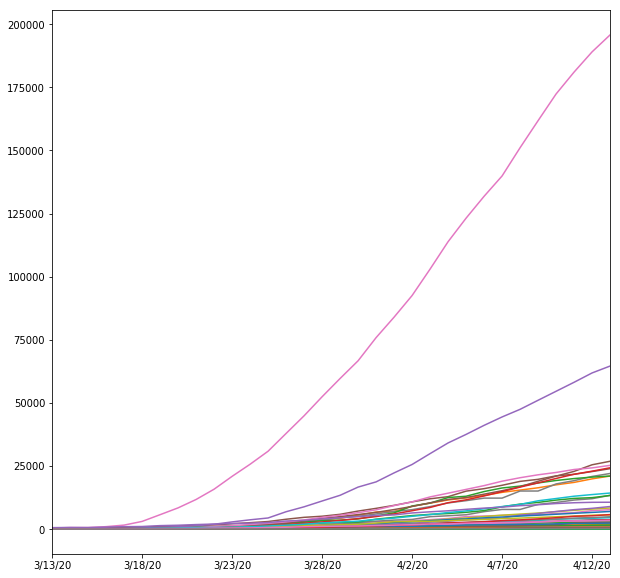

In [19]:
cSum[len(cSum.index)-33:len(cSum.index)-1].plot.line(legend = False, figsize = (10,10))

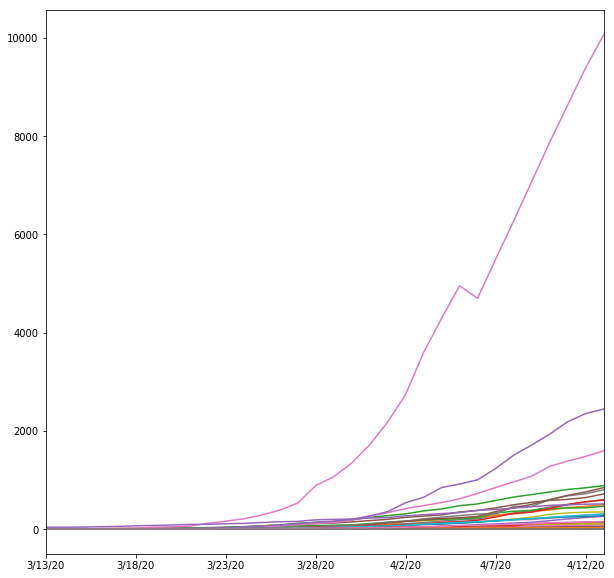

In [20]:
dSum[len(dSum.index)-33:len(dSum.index)-1].plot.line(legend = False, figsize = (10,10))

#### Slope of Confirmed in the US (29635)

In [21]:
print ( "%10d" % (cSumWSlope['slope'].sum()))

     24919


#### Slope of Dead in the US (1751)

In [22]:
print ( "%10d" % (dSumWSlope['slope'].sum()))

      1506
